<a href="https://colab.research.google.com/github/IISC-ICAIML-Project/Covid-19-Mortality-Prediction/blob/data_imbalance_resampling/Covid_19_Mortality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparing the tools

pandas, numpy and matplotlib for data analysis and manipulation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Models from Scikit learn

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay 


## Data Exploration

In [4]:
# load the data into a data frame

df = pd.read_csv('https://github.com/IISC-ICAIML-Porject/Covid-19-Mortality-Prediction/blob/master/data/Covid%20Data.csv?raw=true',header=0)

In [5]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [6]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [7]:
df.shape

(1048575, 21)

### Data analysis and Understanding

This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of **21 unique features** and **1,048,576 unique patients**. In the Boolean features, **1** means **"yes"** and **2** means **"no"**. values as **97** and **99** are **missing data**.

* sex: 1 for female and 2 for male.
* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

## Data Cleaning

We find the total number of missing values in each of the 21 features and corresponding percentage of missing value contributed by each of these features

In [8]:
df_reduced = df.copy()
df_reduced = df_reduced.replace([97, 98, 99], np.nan)
missing_counts = df_reduced.isnull().sum()
invalid_counts = df_reduced.isin([97, 98, 99]).sum()
total_missing_counts = missing_counts + invalid_counts
perc_missing_values = round(total_missing_counts / len(df) * 100, 2)
missing_df = pd.DataFrame({'Feature': df_reduced.columns, 'NaN_count': missing_counts, '97_98_99_count': invalid_counts, 'Total_missing_count': total_missing_counts, 'Percentage_missing': perc_missing_values})
missing_df = missing_df.sort_values(by='Percentage_missing', ascending=False)

print(missing_df)

                                   Feature  NaN_count  97_98_99_count  \
ICU                                    ICU     856032               0   
INTUBED                            INTUBED     855869               0   
PREGNANT                          PREGNANT     527265               0   
PNEUMONIA                        PNEUMONIA      16003               0   
OTHER_DISEASE                OTHER_DISEASE       5045               0   
INMSUPR                            INMSUPR       3404               0   
DIABETES                          DIABETES       3338               0   
TOBACCO                            TOBACCO       3220               0   
HIPERTENSION                  HIPERTENSION       3104               0   
RENAL_CHRONIC                RENAL_CHRONIC       3006               0   
OBESITY                            OBESITY       3032               0   
CARDIOVASCULAR              CARDIOVASCULAR       3076               0   
COPD                                  COPD       30

New copy of the original dataframe is created . We get the count of unique values present in each column 

In [9]:
df_copy = df.copy()
df_copy.shape

for i in df.columns:
 print(df[i].value_counts())
 print('\n')

2    662903
1    385672
Name: USMER, dtype: int64


12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64


1    525064
2    523511
Name: SEX, dtype: int64


1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64


9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64


97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64


2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64


30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64


97    523511
2     51317

As Men cannot be PREGNANT, we convert all the 97(missing values) to 2(No) for all row values with SEX = 2(MALE) 

In [10]:
# replace all the missing values from PREGNANT column if Gender is MALE
df_copy.loc[(df_copy.SEX == 2) & (df_copy.PREGNANT == 97), "PREGNANT"] = df_copy["PREGNANT"].replace(97, 2)

df_copy[(df_copy.SEX == 2)]["PREGNANT"]

1          2
2          2
4          2
11         2
12         2
          ..
1048570    2
1048571    2
1048572    2
1048573    2
1048574    2
Name: PREGNANT, Length: 523511, dtype: int64

Consider the column CLASIFICATION_FINAL which describes if the patient is tested positive for Covid or was the test inconclusive.

For values >=4 i.e. 4,5,6,7 , the test is either negative or inconclusive, hence, we will replace it with 0("NO") 

For Values 1,2,3 the covid test is Positive, hence, we will replace it with 1("YES")

In [11]:
# Consider CLASSIFICATION column , replace all values >4 with 2("NO") since covid test is inconclusive 
df_copy.loc[(df_copy.CLASIFFICATION_FINAL >= 4), "CLASIFFICATION_FINAL"] = df_copy["CLASIFFICATION_FINAL"].replace([4,5,6,7], 0)

print("Repacing 4,5,6,7 with 0 since covid test is inconclusive\n",df_copy['CLASIFFICATION_FINAL'].value_counts())

# Consider all values in [1,2,3] as tested positive for Covid-19 Virus
df_copy.loc[(df_copy.CLASIFFICATION_FINAL >= 1), "CLASIFFICATION_FINAL"] = df_copy["CLASIFFICATION_FINAL"].replace([1,2,3], 1)

print("Repacing 1,2,3 with 1 since covid test is Positive\n",df_copy['CLASIFFICATION_FINAL'].value_counts())

Repacing 4,5,6,7 with 0 since covid test is inconclusive
 0    656596
3    381527
1      8601
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64
Repacing 1,2,3 with 1 since covid test is Positive
 0    656596
1    391979
Name: CLASIFFICATION_FINAL, dtype: int64


We filter out the columns which do not give us useful information 

MEDICAL_UNIT - no useful info can be got since it is not known what the enumerations {1, 2, ... 12, 13} mean.

ICU  and INTUBATED - Too many missing values.

In [12]:
Filtered_Cols=['USMER', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
       'PNEUMONIA', 'AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL','PREGNANT']

df_reduced=df_copy[Filtered_Cols].copy()

In [13]:
# The shape of data frame after considering the filled values from different columns
original_number_of_datapoints = df_reduced.shape
df_reduced = df_reduced.replace([97, 98, 99], np.nan)
df_reduced=df_reduced.dropna(axis=0)
print(df_reduced.head(),"\n",df_reduced.shape,original_number_of_datapoints)

   USMER  SEX  PATIENT_TYPE   DATE_DIED  PNEUMONIA   AGE  DIABETES  COPD  \
0      2    1             1  03/05/2020        1.0  65.0       2.0   2.0   
1      2    2             1  03/06/2020        1.0  72.0       2.0   2.0   
2      2    2             2  09/06/2020        2.0  55.0       1.0   2.0   
3      2    1             1  12/06/2020        2.0  53.0       2.0   2.0   
4      2    2             1  21/06/2020        2.0  68.0       1.0   2.0   

   ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  \
0     2.0      2.0           1.0            2.0             2.0      2.0   
1     2.0      2.0           1.0            2.0             2.0      1.0   
2     2.0      2.0           2.0            2.0             2.0      2.0   
3     2.0      2.0           2.0            2.0             2.0      2.0   
4     2.0      2.0           1.0            2.0             2.0      2.0   

   RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  PREGNANT  
0            2.0      2.0 

In [14]:
# "In data set 9999-99-99 indicates person is not died, so replacing these values with 0. Persons who really died has values 03-03-2020 format. So replacing data format values with 1. So 0 means died, 1 means not died in DATE_DIED column

df_reduced["DATE_DIED"] = [0 if each=="9999-99-99" else 1 for each in df_reduced.DATE_DIED]

In [15]:
for i in df_reduced.columns:
 print(df_reduced[i].value_counts())
 print('\n')

2    655933
1    365722
Name: USMER, dtype: int64


2    511795
1    509860
Name: SEX, dtype: int64


1    830233
2    191422
Name: PATIENT_TYPE, dtype: int64


0    947100
1     74555
Name: DATE_DIED, dtype: int64


2.0    884402
1.0    137253
Name: PNEUMONIA, dtype: int64


30.0     26456
31.0     25419
28.0     24735
29.0     24595
34.0     24406
         ...  
115.0        2
119.0        2
111.0        1
121.0        1
113.0        1
Name: AGE, Length: 118, dtype: int64


2.0    899531
1.0    122124
Name: DIABETES, dtype: int64


2.0    1007356
1.0      14299
Name: COPD, dtype: int64


2.0    991243
1.0     30412
Name: ASTHMA, dtype: int64


2.0    1008105
1.0      13550
Name: INMSUPR, dtype: int64


2.0    862521
1.0    159134
Name: HIPERTENSION, dtype: int64


2.0    994597
1.0     27058
Name: OTHER_DISEASE, dtype: int64


2.0    1001613
1.0      20042
Name: CARDIOVASCULAR, dtype: int64


2.0    865081
1.0    156574
Name: OBESITY, dtype: int64


2.0    1003350
1.0      18305
Name

In [16]:
num_died = (df_reduced['DATE_DIED'] == 1).sum()
num_not_died = (df_reduced['DATE_DIED'] == 0).sum()
perc_died = num_died / len(df_reduced) * 100
perc_not_died = num_not_died / len(df_reduced) * 100

# Print the results
print("Number of people who died:", num_died)
print("Number of people who did not die:", num_not_died)
print("Percentage of people who died:", perc_died, "%")
print("Percentage of people who did not die:", perc_not_died, "%")

Number of people who died: 74555
Number of people who did not die: 947100
Percentage of people who died: 7.2974732174755665 %
Percentage of people who did not die: 92.70252678252443 %


Consider the column 'PATIENT_TYPE' . 

It describes whether the patient returned home (1) or hosptialized (2) 
we will change the feature name to Hospitalized and have Yes as 1 No as 0

In [17]:
df_reduced.loc[(df_reduced.PATIENT_TYPE == 1), "PATIENT_TYPE"] = df_reduced["PATIENT_TYPE"].replace(1, 0)
df_reduced.loc[(df_reduced.PATIENT_TYPE == 2), "PATIENT_TYPE"] = df_reduced["PATIENT_TYPE"].replace(2, 1)

Convert all 2(No) and 1(Yes) Values to binary  0(No) and 1(Yes)

In [18]:
df_final = df_reduced.copy()
for col in df_final.columns:
  df_final = df_final.replace(2,0)

df_final = df_final.astype(int)
df_final

,USMER,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,PREGNANT
0,0,1,0,1,1,65,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,1,72,0,0,0,0,1,0,0,1,1,0,0,0
2,0,0,1,1,0,55,1,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,1,0,53,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,68,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0
1048571,1,0,1,0,0,51,0,0,0,0,1,0,0,0,0,0,0,0
1048572,0,0,0,0,0,55,0,0,0,0,0,0,0,0,0,0,0,0
1048573,0,0,0,0,0,28,0,0,0,0,0,0,0,0,0,0,0,0


### Applying one hot encoding to AGE and SEX Columns



In [19]:
age_bins = [0, 20, 40, 60, 80, 100, 120]
age_labels = ['0-20', '20-40', '40-60', '60-80','80-100','100-120']
df_final['AGE_GROUP'] = pd.cut(df_final['AGE'], bins=age_bins, labels=age_labels)

# Apply one hot encoding using pd.get_dummies()
one_hot_encoded = pd.get_dummies(df_final['AGE_GROUP'], prefix='AGE')

# Concatenate the original dataframe with the one hot encoded dataframe
df_final = pd.concat([df_final, one_hot_encoded], axis=1)

# Drop the original "AGE" and "AGE_GROUP" columns
df_final.drop(['AGE', 'AGE_GROUP'], axis=1, inplace=True)

gender_one_hot = pd.get_dummies(df_final['SEX'], prefix='GENDER', prefix_sep='')
df_final = pd.concat([df_final, gender_one_hot], axis=1)
df_final.drop(['SEX'], axis=1, inplace=True)

df_final = df_final.rename(columns={'PATIENT_TYPE':'HOSPITALIZED', 'DATE_DIED':'DEATH','CLASIFFICATION_FINAL':'COVID-TEST','GENDER0':'MALE','GENDER1':'FEMALE'})


In [20]:
df_final.head()

,USMER,HOSPITALIZED,DEATH,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,...,COVID-TEST,PREGNANT,AGE_0-20,AGE_20-40,AGE_40-60,AGE_60-80,AGE_80-100,AGE_100-120,MALE,FEMALE
0,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0


# Data Preparation for Model training

In [21]:
# get 3 sets of data - train , val , test

X = df_final.drop("DEATH", axis=1)
y = df_final["DEATH"]

# this split gives 2 sets for training and final model testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# this split gives 2 sets for model training and model validation - hyperparameter tuning
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

print(X_train.shape, X_val.shape, X_test.shape)

(572126, 23) (143032, 23) (306497, 23)


Henceforth , we will only use X_train and X_val for hyperparameter tuning.
X_test will be reserved only for perfomrance metrics of the final model.

## Resolving Data Imbalance

### SMOTE Method from imblearn

In [22]:
from imblearn.over_sampling import SMOTE, KMeansSMOTE

In [23]:
# transform the dataset
oversample = SMOTE(sampling_strategy=0.6)
X_train_SMOTE, y_train_SMOTE = oversample.fit_resample(X_train, y_train)

print(X_train_SMOTE.shape)

(848537, 23)


In [24]:
print(y_train_SMOTE.value_counts())

0    530336
1    318201
Name: DEATH, dtype: int64


In [83]:
X_train_SMOTE, y_train_SMOTE = shuffle(X_train_SMOTE, y_train_SMOTE, random_state=2023)

In [25]:
# transform the dataset
oversample_KM = KMeansSMOTE(sampling_strategy=0.6, n_jobs=-1)
X_train_KMSMOTE, y_train_KMSMOTE = oversample.fit_resample(X_train, y_train)

print(X_train_KMSMOTE.shape)
print(y_train_KMSMOTE.value_counts())

(848537, 23)
0    530336
1    318201
Name: DEATH, dtype: int64


In [84]:
X_train_KMSMOTE, y_train_KMSMOTE = shuffle(X_train_KMSMOTE, y_train_KMSMOTE, random_state=2023)

### Resample from Sklearn

In [26]:
from sklearn.utils import resample

In [27]:
X_train_minority_resampled, y_train_minority_resampled = resample(X_train[y_train == 1], y_train[y_train == 1],
                                    n_samples=round(0.5*X_train[y_train == 0].shape[0]),
                                    replace=True,
                                    random_state=2023)

X_train_resampled = pd.concat([X_train_minority_resampled, X_train])
y_train_resampled = pd.concat([y_train_minority_resampled, y_train])

In [85]:
X_train_resampled, y_train_resampled = shuffle(X_train_resampled, y_train_resampled, random_state=2023)

In [28]:
print(X_train_resampled.shape)
print(y_train_resampled.value_counts())

(837294, 23)
0    530336
1    306958
Name: DEATH, dtype: int64


### Naive dupliction

In [44]:
from sklearn.utils import shuffle

In [86]:
# create a new DataFrame that is a copy of the rows with a value of 1, repeated three times
ones_df = pd.concat([y_train[y_train == 1]] * 6, axis=0)
X_ones = pd.concat([X_train[y_train == 1]] * 6, axis=0)

# concatenate the original DataFrame with the new DataFrame
X_train_balanced = pd.concat([X_train, X_ones])
y_train_balanced = pd.concat([y_train, ones_df])

# shuffle the rows in the new DataFrame
X_train_balanced, y_train_balanced = shuffle(X_train_balanced, y_train_balanced, random_state=2023)

In [68]:
print(X_train_balanced.shape)
print(y_train_balanced.value_counts())

(822866, 23)
0    530336
1    292530
Name: DEATH, dtype: int64


## Modeling

2 ML models
1. Logistic Regression
2. Random Forest Classifier

In [62]:
import cupy as cp

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define the pipeline
pipe = Pipeline([
    ('clf', None)
])

# Define the hyperparameters for each estimator in the pipeline
param_grid = [
    {
        'clf': [LogisticRegression(max_iter =1000, solver='newton-cholesky')],
        # 'clf__penalty': ['l1', 'l2'],
        # 'clf__C': [0.1, 1, 10]
    },
    {
        'clf': [RandomForestClassifier()],
        # 'clf__n_estimators': [50, 100, 200],
        # 'clf__max_depth': [5, 10, 15]
    },
    {
        'clf': [XGBClassifier()],
        # 'clf__learning_rate': [0.1, 0.01, 0.001],
        # 'clf__n_estimators': [50, 100, 200]
    }
]

# Create the grid search object
grid_SMOTE = GridSearchCV(pipe, param_grid, scoring=['f1','accuracy'], refit='f1', cv=5, n_jobs =-1)
grid_KMSMOTE = GridSearchCV(pipe, param_grid, scoring=['f1','accuracy'], refit='f1', cv=5,  n_jobs =-1)
grid_resampled = GridSearchCV(pipe, param_grid, scoring=['f1','accuracy'], refit='f1', cv=5,  n_jobs =-1)
grid_balanced = GridSearchCV(pipe, param_grid, scoring=['f1','accuracy'], refit='f1', cv=5,  n_jobs =-1)

# Run the GridSearchCV on the GPU
with cp.cuda.Device(0):
  # Fit the grid search to the data
  grid_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
  grid_KMSMOTE.fit(X_train_KMSMOTE, y_train_KMSMOTE)
  grid_resampled.fit(X_train_resampled, y_train_resampled)
  grid_balanced.fit(X_train_balanced, y_train_balanced)


/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [88]:
print("Best estimator: ", grid_SMOTE.best_estimator_)
print("Best score: ", grid_SMOTE.best_score_)
pd.DataFrame(grid_SMOTE.cv_results_)

Best estimator:  Pipeline(steps=[('clf', RandomForestClassifier())])
Best score:  0.8822152757761321


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,...,std_test_f1,rank_test_f1,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,2.272152,0.051980,0.162150,0.007180,"LogisticRegression(max_iter=1000, solver='newt...","{'clf': LogisticRegression(max_iter=1000, solv...",0.860393,0.862331,0.861868,0.862039,...,0.000670,3,0.893541,0.895102,0.893947,0.894677,0.894465,0.894346,0.000548,3
1,86.994815,3.582697,4.838471,0.470954,RandomForestClassifier(),{'clf': RandomForestClassifier()},0.881147,0.882108,0.883269,0.882182,...,0.000677,1,0.906428,0.907211,0.907393,0.907075,0.907305,0.907082,0.000344,1
2,152.583086,19.720492,0.783130,0.302611,"XGBClassifier(base_score=None, booster=None, c...","{'clf': XGBClassifier(base_score=None, booster...",0.878687,0.879199,0.880476,0.879080,...,0.000605,2,0.904159,0.904683,0.904995,0.904488,0.904871,0.904639,0.000295,2


In [89]:
print("Best estimator: ", grid_KMSMOTE.best_estimator_)
print("Best score: ", grid_KMSMOTE.best_score_)
pd.DataFrame(grid_SMOTE.cv_results_)

Best estimator:  Pipeline(steps=[('clf', RandomForestClassifier())])
Best score:  0.8819280205204454


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,...,std_test_f1,rank_test_f1,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,2.272152,0.051980,0.162150,0.007180,"LogisticRegression(max_iter=1000, solver='newt...","{'clf': LogisticRegression(max_iter=1000, solv...",0.860393,0.862331,0.861868,0.862039,...,0.000670,3,0.893541,0.895102,0.893947,0.894677,0.894465,0.894346,0.000548,3
1,86.994815,3.582697,4.838471,0.470954,RandomForestClassifier(),{'clf': RandomForestClassifier()},0.881147,0.882108,0.883269,0.882182,...,0.000677,1,0.906428,0.907211,0.907393,0.907075,0.907305,0.907082,0.000344,1
2,152.583086,19.720492,0.783130,0.302611,"XGBClassifier(base_score=None, booster=None, c...","{'clf': XGBClassifier(base_score=None, booster...",0.878687,0.879199,0.880476,0.879080,...,0.000605,2,0.904159,0.904683,0.904995,0.904488,0.904871,0.904639,0.000295,2


In [90]:
print("Best estimator: ", grid_resampled.best_estimator_)
print("Best score: ", grid_resampled.best_score_)
pd.DataFrame(grid_resampled.cv_results_)

Best estimator:  Pipeline(steps=[('clf', RandomForestClassifier())])
Best score:  0.8822078094630259


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,...,std_test_f1,rank_test_f1,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,2.480423,0.338453,0.157390,0.041921,"LogisticRegression(max_iter=1000, solver='newt...","{'clf': LogisticRegression(max_iter=1000, solv...",0.859574,0.857261,0.857380,0.857891,...,0.000830,3,0.895121,0.893228,0.893317,0.893771,0.894093,0.893906,0.000683,3
1,83.195637,3.992494,5.199052,0.306014,RandomForestClassifier(),{'clf': RandomForestClassifier()},0.882584,0.881381,0.882795,0.882114,...,0.000486,1,0.909303,0.908019,0.908885,0.908700,0.908789,0.908739,0.000415,1
2,134.985779,12.146603,0.714053,0.204719,"XGBClassifier(base_score=None, booster=None, c...","{'clf': XGBClassifier(base_score=None, booster...",0.879074,0.876464,0.877368,0.876903,...,0.000885,2,0.906055,0.903905,0.904538,0.904424,0.904782,0.904741,0.000717,2


In [91]:
print("Best estimator: ", grid_balanced.best_estimator_)
print("Best score: ", grid_balanced.best_score_)
pd.DataFrame(grid_balanced.cv_results_)

Best estimator:  Pipeline(steps=[('clf', RandomForestClassifier())])
Best score:  0.8778378753016348


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,...,std_test_f1,rank_test_f1,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,2.388456,0.308562,0.183861,0.051395,"LogisticRegression(max_iter=1000, solver='newt...","{'clf': LogisticRegression(max_iter=1000, solv...",0.853689,0.853254,0.853417,0.852919,...,0.000597,3,0.893811,0.893476,0.893445,0.893172,0.894478,0.893676,0.000449,3
1,86.971598,5.224460,4.542908,0.266087,RandomForestClassifier(),{'clf': RandomForestClassifier()},0.878033,0.877696,0.878085,0.876294,...,0.000900,1,0.908126,0.908065,0.908132,0.907056,0.909037,0.908083,0.000628,1
2,130.161785,13.776138,0.653424,0.104359,"XGBClassifier(base_score=None, booster=None, c...","{'clf': XGBClassifier(base_score=None, booster...",0.872602,0.872980,0.872903,0.872026,...,0.000750,2,0.903758,0.904158,0.903939,0.903368,0.905039,0.904052,0.000557,2


In [92]:
print(grid_SMOTE.best_estimator_.score(X_val,y_val),"\n",grid_KMSMOTE.best_estimator_.score(X_val,y_val),
      "\n",grid_resampled.best_estimator_.score(X_val,y_val),"\n", grid_balanced.best_estimator_.score(X_val,y_val))

0.8957925499188992 
 0.8952681917333184 
 0.8967433860954193 
 0.8976033335197718


In [ ]:
# put models in dictionary

models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9365588187793336,
 'Random Forest': 0.9357953516598069}

## Model Comparision

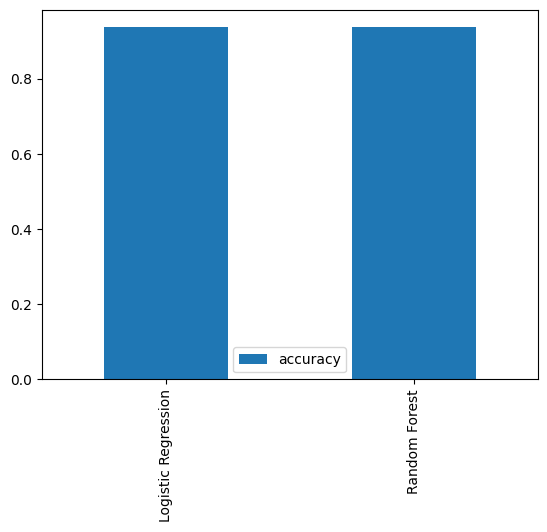

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();